<a href="https://colab.research.google.com/github/ArrogantNobody/Pytorch_study/blob/main/pytorch_foundation_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://zhuanlan.zhihu.com/p/115063853

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)

x = torch.cat((x0,x1),0).type(torch.FloatTensor)#(200,2)
print(x)
y = torch.cat((y0,y1)).type(torch.LongTensor)
print(y)

x,y = Variable(x),Variable(y)

tensor([[ 1.9719,  1.9553],
        [ 3.7204,  3.6605],
        [ 1.1523,  1.5124],
        [ 2.7206,  3.3739],
        [ 1.7313,  2.0891],
        [ 1.7772,  1.6889],
        [ 2.1132,  1.4012],
        [ 2.4798,  3.4977],
        [ 0.9862,  1.4963],
        [ 2.8853,  0.2188],
        [ 0.1952,  2.1765],
        [ 1.4636,  2.3039],
        [ 0.5580,  1.5541],
        [ 0.9611,  2.2232],
        [ 1.5115,  2.6148],
        [ 0.5877,  2.6374],
        [ 2.1320,  1.6200],
        [ 2.2772,  2.4365],
        [ 1.6750,  0.4751],
        [ 0.2816,  2.4190],
        [ 2.8819,  1.8759],
        [ 3.3775,  3.5260],
        [ 2.0119,  0.3318],
        [ 2.2797,  0.8883],
        [ 2.3202,  3.1374],
        [ 3.0047,  2.1714],
        [ 0.8003,  0.7416],
        [ 3.3004, -0.2414],
        [ 2.4398,  2.2994],
        [ 3.5184,  3.4122],
        [ 1.7497,  1.9036],
        [ 0.3195,  2.3106],
        [ 2.4526,  2.8037],
        [ 2.0343,  2.7009],
        [ 1.6792,  1.7732],
        [ 2.4060,  1

In [3]:
class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = F.sigmoid(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out = self.predict(out)
        return out

In [4]:
net = Net(2,20,2)#two dimention(shape[1])
print(net)

Net(
  (hidden1): Linear(in_features=2, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


torch.Size([200])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


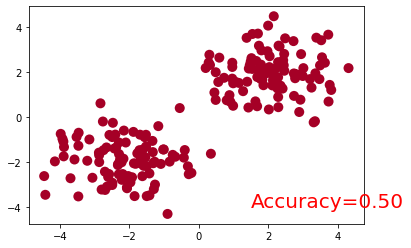

torch.Size([200])


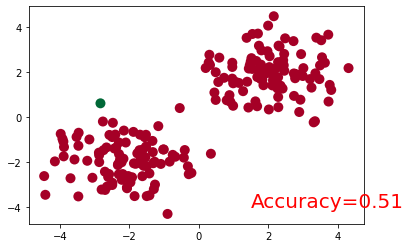

torch.Size([200])


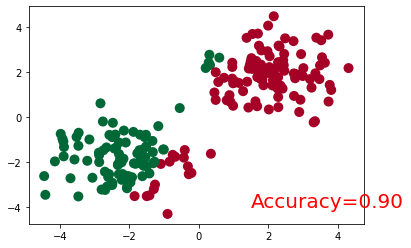

torch.Size([200])


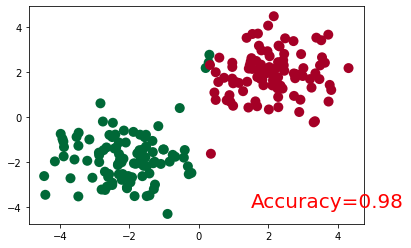

torch.Size([200])


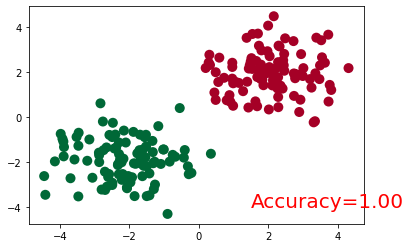

In [5]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    #print(out)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%20==0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        #print(torch.max(F.softmax(out),1))
        prediction = torch.max(F.softmax(out),1)[1]#行上实现softmax
        print(prediction.shape)
        pred_y = prediction.data.numpy().squeeze()
        #print(pred_y)
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()